In [1]:
from tensorflow.keras.models import load_model
from PIL import ImageFile, Image
import cv2
import numpy as np
import base64
import keras
import matplotlib.pyplot as plt


In [2]:
def estimate_blur(image: np.array, threshold: int = 100):
    """
    It calculates the variance of the Laplacian of the image
    
    :param image: The image that you want to check for blur
    :type image: np.array
    :param threshold: The minimum variance of the Laplacian to qualify a region as blurry, defaults to
    100
    :type threshold: int (optional)
    :return: The variance of the Laplacian of the image.
    """
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur_map = cv2.Laplacian(image, cv2.CV_64F)
    score = np.var(blur_map)
    return score, bool(score < threshold)
    
def toBase64HardScores(imageArray):
    """
    It takes an image array, converts it to a jpg, converts the jpg to bytes, converts the bytes to
    base64, and then converts the base64 to a string.
    
    :param imageArray: The image array that you want to convert to base64
    :return: A base64 encoded string of the image
    """
    _, buffer = cv2.imencode('.jpg', imageArray)
    im_bytes = buffer.tobytes()
    jpg_as_text = base64.b64encode(im_bytes)
    imgArray = jpg_as_text.decode('utf8')
    return imgArray


def CheckBlurImage(ImageArray, type = "web"):
    score, blurry = estimate_blur(ImageArray, 100)
    base64toOutputs = toBase64HardScores(imageArray= ImageArray)
    if type == 'web':
        data = {
            'Score' : score,
            'scoreBlur' : blurry,
            'Base64Image' : base64toOutputs
        }   
        return data
    if type == 'app':
        return blurry



In [3]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
    
modelSeg = load_model('/home/ai_car/Preprocessing-MedicalImage/model/model512x512.h5', custom_objects={'dice_coef':dice_coef,
                                                                                            'dice_coef_loss': dice_coef_loss})

In [8]:
image = Image.open('/home/ai_car/Preprocessing-MedicalImage/image/00003276_004.png').convert('L')
image = image.resize((512, 512))
image = np.asarray(image)
image = image.reshape(image.shape[0], image.shape[1], 1)
original = image.copy()
mask = modelSeg.predict(np.expand_dims(image, axis=0))
mask = np.squeeze(mask)

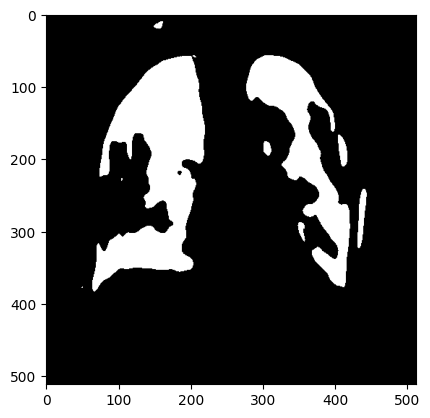

In [9]:
plt.imshow(mask, cmap='gray')

In [13]:
mask
plt.imshow(np.squeeze(mask),cmap = 'gray')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
mask.shape

(128, 128)

In [17]:
mask[:, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
from skimage.measure import find_contours
import numpy as np


def save_co_ordinates(image, boxes, masks, class_ids = 1):
    image = image.split("/")[-1]
    image_data = []

    for i in range(boxes.shape[0]):

        class_id = 1
        mask = masks[:, :]
        padded_mask = np.zeros(
            (mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
        padded_mask[1:-1, 1:-1] = mask
        contours = find_contours(padded_mask, 0.5)
        for verts in contours:
            verts = np.fliplr(verts) - 1
            list_co_ordinates = np.moveaxis(verts, 1, 0).tolist()

            region = {"shape_attributes": {"all_points_x": list_co_ordinates[0],
                                           "all_points_y": list_co_ordinates[1]},
                      "region_attributes": {"name": 'test'}}
            image_data.append(region)
    data = {"filename": image, "regions": image_data}
    return data

save_co_ordinates("C:/path/apple.jpg", mask, mask )

{'filename': 'apple.jpg',
 'regions': [{'shape_attributes': {'all_points_x': [112.0,
     111.5,
     111.0,
     110.5,
     110.0,
     109.5,
     109.0,
     108.5,
     108.0,
     107.5,
     107.0,
     106.0,
     105.5,
     105.0,
     104.5,
     104.0,
     103.0,
     102.5,
     102.0,
     101.5,
     101.5,
     102.0,
     103.0,
     103.5,
     104.0,
     104.5,
     104.5,
     104.0,
     103.5,
     103.0,
     102.0,
     101.5,
     101.0,
     100.5,
     100.0,
     99.5,
     99.5,
     99.0,
     98.5,
     98.5,
     98.0,
     97.5,
     97.5,
     97.5,
     97.0,
     96.5,
     96.5,
     96.0,
     95.5,
     95.5,
     95.0,
     94.5,
     94.0,
     93.5,
     93.5,
     93.0,
     92.5,
     92.0,
     91.5,
     91.5,
     91.0,
     90.5,
     90.5,
     90.0,
     89.5,
     89.5,
     89.0,
     88.5,
     88.5,
     88.0,
     87.5,
     87.0,
     86.5,
     86.0,
     85.5,
     85.0,
     84.5,
     84.0,
     83.5,
     83.0,
     82.5,
 